# Environmental Module Example

In [1]:
%matplotlib inline

Prepare the test data for loading. The files required can be found in the test_data directory of the source code and should be copied to the directory that the notebook is running. When the python file is run a pickle file is generated containing a dictionary of inputs.

In [2]:
%run fixed_wave_fixed_layout_scenario.py
%run environmental_example_data.py

generate test data: D:\Usuarios\108630\Programming\Python\notebooks\fixed_wave_fixed_layout_scenario.pkl
    Subclass or Group Observed
0           mysticete    False
1           dolphinds    False
2   large odontoncete    False
3         odontoncete    False
4  particular habitat    False
5                fish    False
generate test data: D:\Usuarios\108630\Programming\Python\notebooks\environmental_example_data.pkl


In [3]:
from IPython.display import display, HTML

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14.0, 8.0)

In [5]:
import numpy as np
from datetime import datetime

In [6]:
from dtocean_core import start_logging
from dtocean_core.core import Core
from dtocean_core.menu import DataMenu, ModuleMenu, ProjectMenu, ThemeMenu
from dtocean_core.pipeline import Tree, _get_connector
from dtocean_core.strategy import StrategyManager

In [7]:
# Bring up the logger
start_logging()

2016-10-24 20:55:52,638 - INFO - dtocean_core - Begin logging for dtocean_core.


In [8]:
def html_list(x):
    message = "<ul>"
    for name in x:
        message += "<li>{}</li>".format(name)
    message += "</ul>"
    return message
def html_dict(x):
    message = "<ul>"
    for name, status in x.iteritems():
        message += "<li>{}: <b>{}</b></li>".format(name, status)
    message += "</ul>"
    return message
def html_variable(core, project, variable):
    value = variable.get_value(core, project)
    metadata = variable.get_metadata(core)
    name = metadata.title
    units = metadata.units
    message = "<b>{}:</b> {}".format(name, value)
    if units:
        message += " ({})".format(units[0])
    return message

## Create the core, menus and pipeline tree

The core object carrys all the system information and is operated on by the other classes

In [9]:
new_core = Core()
project_menu = ProjectMenu()
module_menu = ModuleMenu()
theme_menu = ThemeMenu()
data_menu = DataMenu()
pipe_tree = Tree()

## Create a new project and tree

In [10]:
project_title = "DTOcean"  
new_project = project_menu.new_project(new_core, project_title)

2016-10-24 20:55:58,661 - INFO - aneris.entity.simulation - Created new Simulation with title "Default"
2016-10-24 20:55:58,661 - INFO - aneris.control.simulation - Datastate with level "initial" stored
2016-10-24 20:55:58,671 - INFO - aneris.control.pipeline - New Hub created for interface ProjectInterface.


## Set the device type

In [11]:
options_branch = pipe_tree.get_branch(new_core, new_project, "System Type Selection")
variable_id = "device.system_type"
my_var = options_branch.get_input_variable(new_core, new_project, variable_id)
my_var.set_raw_interface(new_core, "Wave Fixed")
my_var.read(new_core, new_project)

2016-10-24 20:55:58,710 - INFO - aneris.control.data - New "device.system_type" data stored with index BFNNVI
2016-10-24 20:55:58,710 - INFO - aneris.control.simulation - Datastate stored


## Initiate the pipeline
This step will be important when the database is incorporated into the system as it will effect the operation of the pipeline.

In [12]:
project_menu.initiate_pipeline(new_core, new_project)

2016-10-24 20:55:58,730 - INFO - aneris.control.simulation - Datastate with level "system type selection start" stored
2016-10-24 20:55:58,740 - INFO - aneris.control.data - New "hidden.pipeline_active" data stored with index 662HVL
2016-10-24 20:55:58,750 - INFO - aneris.control.simulation - Datastate with level "system type selection output" stored
2016-10-24 20:55:58,750 - INFO - aneris.control.pipeline - New Pipeline created for interface ModuleInterface.
2016-10-24 20:55:58,750 - INFO - aneris.control.pipeline - New Hub created for interface ThemeInterface.


## Discover available modules

In [13]:
names = module_menu.get_available(new_core, new_project)
message = html_list(names)
HTML(message)

## Activate some modules

Note that the order of activation is important and that we can't deactivate yet!

In [14]:
module_menu.activate(new_core, new_project, 'Hydrodynamics')
module_menu.activate(new_core, new_project, 'Electrical Sub Systems')
module_menu.activate(new_core, new_project, 'Mooring and Foundations')


## Activate the Economics and Reliability themes

In [15]:
names = theme_menu.get_available(new_core, new_project)
message = html_list(names)
HTML(message)

In [16]:
theme_menu.activate(new_core, new_project, "Economics")
theme_menu.activate(new_core, new_project, "Environmental Impact Assessment")

In [17]:
# Here we are expecting Hydrodynamics
assert _get_connector(new_project, "modules").get_current_interface_name(new_core, new_project) == "Hydrodynamics"

## Initiate the dataflow
This indicates that the filtering and module / theme selections are complete

In [18]:
project_menu.initiate_dataflow(new_core, new_project)

2016-10-24 20:55:59,052 - INFO - aneris.control.data - New "hidden.dataflow_active" data stored with index F8RJSF
2016-10-24 20:55:59,062 - INFO - aneris.control.simulation - Datastate stored
2016-10-24 20:55:59,102 - INFO - aneris.control.simulation - Datastate with level "modules initial" stored


## Create the branches assosiated to the modules

In [19]:
hydro_branch = pipe_tree.get_branch(new_core, new_project, "Hydrodynamics")
electro_branch = pipe_tree.get_branch(new_core, new_project, 'Electrical Sub Systems')
moorings_branch = pipe_tree.get_branch(new_core, new_project, 'Mooring and Foundations')
eco_branch = pipe_tree.get_branch(new_core, new_project, "Economics")
env_branch = pipe_tree.get_branch(new_core, new_project, "Environmental Impact Assessment")

## Load test data

In [20]:
hydro_branch.read_test_data(new_core,
                            new_project,
                            "fixed_wave_fixed_layout_scenario.pkl")

2016-10-24 20:55:59,351 - INFO - aneris.control.data - New "farm.wave_series" data stored with index O8Q0QN
2016-10-24 20:55:59,351 - INFO - aneris.control.data - New "device.installation_depth_max" data stored with index 6DLGJK
2016-10-24 20:55:59,361 - INFO - aneris.control.data - New "device.coordinate_system" data stored with index DWQ4KU
2016-10-24 20:55:59,361 - INFO - aneris.control.data - New "device.minimum_distance_x" data stored with index EDDTY2
2016-10-24 20:55:59,361 - INFO - aneris.control.data - New "device.minimum_distance_y" data stored with index CLBJSS
2016-10-24 20:55:59,361 - INFO - aneris.control.data - New "device.installation_depth_min" data stored with index GUCO1W
2016-10-24 20:55:59,361 - INFO - aneris.control.data - New "device.wave_data_directory" data stored with index E2U7HB
2016-10-24 20:55:59,371 - INFO - aneris.control.data - New "site.lease_boundary" data stored with index PWP6GN
2016-10-24 20:55:59,371 - INFO - aneris.control.data - New "options.opt

In [21]:
electro_branch.read_test_data(new_core,
                              new_project,
                              "fixed_wave_fixed_layout_scenario.pkl")

2016-10-24 20:55:59,796 - INFO - aneris.control.data - New "device.constant_power_factor" data stored with index 7OVVBV
2016-10-24 20:55:59,796 - INFO - aneris.control.data - New "component.power_quality" data stored with index 1MTM6R
2016-10-24 20:55:59,796 - INFO - aneris.control.data - New "corridor.shipping_hist" data stored with index 50D31N
2016-10-24 20:55:59,805 - INFO - aneris.control.data - New "component.switchgear" data stored with index LNH4SZ
2016-10-24 20:55:59,805 - INFO - aneris.control.data - New "component.collection_points" data stored with index 6LNC8H
2016-10-24 20:55:59,805 - INFO - aneris.control.data - New "component.dry_mate_connectors" data stored with index BL50PD
2016-10-24 20:55:59,815 - INFO - aneris.control.data - New "device.voltage" data stored with index JSUHQW
2016-10-24 20:55:59,815 - INFO - aneris.control.data - New "farm.shipping_hist" data stored with index P2SL38
2016-10-24 20:55:59,815 - INFO - aneris.control.data - New "corridor.max_seabed_tem

In [22]:
moorings_branch.read_test_data(new_core,
                               new_project,
                               "fixed_wave_fixed_layout_scenario.pkl")

2016-10-24 20:56:00,348 - INFO - aneris.control.data - New "device.foundation_location" data stored with index 945854
2016-10-24 20:56:00,349 - INFO - aneris.control.data - New "farm.mean_wind_speed_100_year" data stored with index IEYWIX
2016-10-24 20:56:00,351 - INFO - aneris.control.data - New "device.system_profile" data stored with index CRANC3
2016-10-24 20:56:00,355 - INFO - aneris.control.data - New "constants.rectangular_current_drag" data stored with index JPGI2T
2016-10-24 20:56:00,358 - INFO - aneris.control.data - New "constants.gravity" data stored with index A2G3SB
2016-10-24 20:56:00,359 - INFO - aneris.control.data - New "device.dry_beam_area" data stored with index 6AK0ZV
2016-10-24 20:56:00,361 - INFO - aneris.control.data - New "device.wet_beam_area" data stored with index UCR1BX
2016-10-24 20:56:00,364 - INFO - aneris.control.data - New "device.system_height" data stored with index VXBPWK
2016-10-24 20:56:00,365 - INFO - aneris.control.data - New "device.wet_fronta

In [23]:
env_branch.read_test_data(new_core,
                               new_project,
                               "fixed_wave_fixed_layout_scenario.pkl")

2016-10-24 20:56:00,831 - INFO - aneris.control.simulation - Datastate stored


## Check the status of the inputs

* satisfied - data is in the data state
* required - data is not in the data state
* unavailable - data will come from another source

In [24]:
input_status = hydro_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

In [25]:
input_status = electro_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

In [26]:
input_status = moorings_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Prepare the Economics Theme

In [27]:
theme_name = "Economics"
input_status = eco_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Prepare the Environmental Theme

In [28]:
theme_name = "Environmental Impact Assessment"
input_status = env_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Set the discount rate and device cost and project lifetime

In [29]:
discount_rate = 0.05
device_cost = 1000000
project_lifetime = 20

new_var = eco_branch.get_input_variable(new_core, new_project,
                                        "project.discount_rate")
new_var.set_raw_interface(new_core, discount_rate)
new_var.read(new_core, new_project)

new_var = eco_branch.get_input_variable(new_core, new_project,
                                        "device.system_cost")
new_var.set_raw_interface(new_core, device_cost)
new_var.read(new_core, new_project)

new_var = eco_branch.get_input_variable(new_core, new_project,
                                        "project.lifetime")
new_var.set_raw_interface(new_core, project_lifetime)
new_var.read(new_core, new_project)

2016-10-24 20:56:01,048 - INFO - aneris.control.data - New "project.discount_rate" data stored with index WU4LWW
2016-10-24 20:56:01,048 - INFO - aneris.control.simulation - Datastate stored
2016-10-24 20:56:01,096 - INFO - aneris.control.data - New "device.system_cost" data stored with index 3GX23U
2016-10-24 20:56:01,098 - INFO - aneris.control.simulation - Datastate stored
2016-10-24 20:56:01,157 - INFO - aneris.control.data - New "project.lifetime" data stored with index QGELGI
2016-10-24 20:56:01,157 - INFO - aneris.control.simulation - Datastate stored


## Check if the modules can be executed

In [30]:
can_execute = module_menu.is_executable(new_core, new_project, 'Hydrodynamics')
display(can_execute)

can_execute = module_menu.is_executable(new_core, new_project, 'Electrical Sub Systems')
display(can_execute)

can_execute = module_menu.is_executable(new_core, new_project, 'Mooring and Foundations')
display(can_execute)

input_status = hydro_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)

input_status = eco_branch.get_input_status(new_core, new_project)
message += html_dict(input_status)
HTML(message)

input_status = env_branch.get_input_status(new_core, new_project)
message += html_dict(input_status)
HTML(message)

True

False

False

## See what execution strategies are available

First the strategy manager in required to collect the strategy plugins.

In [31]:
strategy_manager = StrategyManager()

In [32]:
strategy_list = strategy_manager.get_available_strategies()
message = html_list(strategy_list)
HTML(message)

## Execute the Basic strategy

The "basic" strategy simply exectutes the chosen modules in sequence 

In [33]:
basic_strategy = strategy_manager.get_strategy("Basic")
basic_strategy.execute(new_core, new_project)

2016-10-24 20:56:01,361 - INFO - aneris.control.simulation - Datastate with level "hydrodynamics start" stored
No NOGO areas related to the machine depthinstallation constraints have been found.
2016-10-24 20:56:01,546 - WARNING - dtocean_hydro.input - [Warning] The wave module cannot run with variable bathymetry
The bathymetry is reduced to its average value.
2016-10-24 20:56:01,548 - INFO - dtocean_hydro.input - The averge bathymetry value is -80.0 m
2016-10-24 20:56:02,703 - WARNING - dtocean_hydro.input - The rated power specified (0.3 W) is smaller than the rated power calculated from the machine data (2330590.00651 W) This situation can lead to unexpected/unrealistic high yield.
2016-10-24 20:56:02,713 - WARNING - dtocean_hydro.input - ('The range of Wave Periods specified in the machine power matrix', 'does not cover the given site', 'Due to the model linearity, this situation can bring unexpected/unrealistic results')
2016-10-24 20:56:02,713 - WARNING - dtocean_hydro.input - ('

C:\Anaconda2\envs\_integration\lib\site-packages\numpy\lib\nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
C:\Anaconda2\envs\_integration\lib\site-packages\numpy\lib\nanfunctions.py:227: RuntimeWarning: All-NaN axis encountered
  warnings.warn("All-NaN axis encountered", RuntimeWarning)
C:\Anaconda2\envs\_integration\lib\site-packages\numpy\lib\nanfunctions.py:326: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


2016-10-24 20:56:27,048 - INFO - aneris.control.data - New "farm.hydro_global_eis" data stored with index VEUA75
2016-10-24 20:56:27,048 - INFO - aneris.control.data - New "farm.hydro_eis" data stored with index 7ZZQ4U
2016-10-24 20:56:27,048 - INFO - aneris.control.data - New "farm.hydro_confidence" data stored with index MDKJVS
2016-10-24 20:56:27,048 - INFO - aneris.control.data - New "farm.hydro_recommendation_dict" data stored with index G582ML
2016-10-24 20:56:27,058 - INFO - aneris.control.simulation - Datastate with level "hydrodynamics global output" stored
2016-10-24 20:56:27,128 - INFO - aneris.control.simulation - Datastate with level "electrical sub systems start" stored
2016-10-24 20:56:29,138 - INFO - dtocean_electrical.main - Begin main run...
2016-10-24 20:56:29,138 - INFO - dtocean_electrical.grid.grid_processing - Merging bathymetry...
2016-10-24 20:56:29,217 - INFO - dtocean_electrical.grid.grid_processing - Creating bathymetry grid points...
2016-10-24 20:56:34,457

## Examine the Hydrodynamics results

Currently, there is no robustness built into the core, so the assumption is that the modules executed successfully. This will have to be improved towards deployment of the final software.

Lets see what outputs are available from the Hydrodynamics module.

In [34]:
output_status = hydro_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

Let's check the number of devices and annual output of the farm, using just information in the data object.

In [35]:
n_devices = hydro_branch.get_output_variable(new_core, new_project, "farm.number_of_devices")
meta_data = n_devices.get_metadata(new_core)
name = meta_data.title
value = n_devices.get_value(new_core, new_project)
message_one = "<p><b>{}:</b> {}</p>".format(name, value)

farm_annual_energy = hydro_branch.get_output_variable(new_core, new_project, "farm.annual_energy")
meta_data = farm_annual_energy.get_metadata(new_core)
name = meta_data.title
value = farm_annual_energy.get_value(new_core, new_project)
units = meta_data.units[0]
message_two = "<p><b>{}:</b> <i>{}</i> ({})</p>".format(name, value, units)

farm_device_power = hydro_branch.get_output_variable(new_core, new_project, "farm.mean_power_per_device")
meta_data = farm_device_power.get_metadata(new_core)
name = meta_data.title
value = farm_device_power.get_value(new_core, new_project)
units = meta_data.units[0]
message_three = "<p><b>{}</b> ({}):{}</p>".format(name, units, html_dict(value))

HTML(message_one + message_two + message_three)

In [36]:
layout = hydro_branch.get_output_variable(new_core, new_project, "farm.layout")
layout.get_value(new_core, new_project)

{'device001': <shapely.geometry.point.Point at 0x11a74198>,
 'device002': <shapely.geometry.point.Point at 0x11afd4a8>,
 'device003': <shapely.geometry.point.Point at 0x11a74c50>,
 'device004': <shapely.geometry.point.Point at 0x11a74898>,
 'device005': <shapely.geometry.point.Point at 0x11a74a58>}

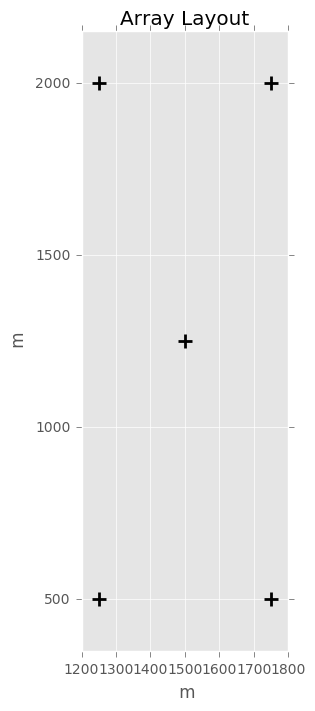

In [37]:
layout.plot(new_core, new_project)

## Examine the Electrical Sub-systems results

Lets see what outputs are available from the modules.

In [38]:
output_status = hydro_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

In [39]:
output_status = electro_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

In [40]:
electrical_cost = electro_branch.get_output_variable(new_core, new_project,
                                                     "farm.electrical_economics_data")
                                            
cost_data = electrical_cost.get_value(new_core, new_project)

In [41]:
cost_data

,Key Identifier,Cost,Quantity,Year
0,17.0,800.0,1300.0,0
1,2.0,700.0,2800.0,0
2,12.0,150000.0,1.0,0
3,6.0,200000.0,9.0,0
4,NaN,1000000.0,1.0,0


In [42]:
substations = electro_branch.get_output_variable(new_core, new_project,
                                                 "farm.substation_layout")
substation_data = substations.get_value(new_core, new_project)

## Examine Economics Results

In [43]:
output_status = eco_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

In [44]:
lcoe = eco_branch.get_output_variable(new_core, new_project, "project.lcoe")
lcoe_capex = eco_branch.get_output_variable(new_core, new_project, "project.capex_lcoe")
total_cost = eco_branch.get_output_variable(new_core, new_project, "project.capex_total")
discount_energy = eco_branch.get_output_variable(new_core, new_project, "project.discounted_energy")
cost_breakdown = eco_branch.get_output_variable(new_core, new_project, "project.capex_breakdown")

In [45]:
message_lcoe = html_variable(new_core, new_project, lcoe)
message_cost = html_variable(new_core, new_project, total_cost)
message_energy = html_variable(new_core, new_project, discount_energy)
message = "<p>{}</p><p>{}</p><p>{}</p>".format(message_lcoe, message_cost, message_energy)
HTML(message)

## Examine Environmental Results

In [46]:
output_status = env_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

In [47]:
hydro_eis = env_branch.get_output_variable(new_core, new_project, "farm.hydro_recommendation_dict")
hydro_eis.get_value(new_core, new_project)

{'Collision Risk': {'Detailed Recommendation': nan,
  'General Recommendation': 'decrease imperatively the number of devices, increase the space between device',
  'Generic Explanation': 'score results of a very high number of devices'},
 'Energy Modification': {'Detailed Recommendation': 'monitoring of the sedimentary evolution in the farm area',
  'General Recommendation': 'decrease the number of devices, increase the space between device',
  'Generic Explanation': 'score results of a high level of energy extraction'},
 'Reef Effect': {'Detailed Recommendation': nan,
  'General Recommendation': 'Favor an orientation facing the current, The scour protection can increase the reef effect',
  'Generic Explanation': 'increase the number of machines, favor a vertical design'},
 'Reserve Effect': None,
 'Resting Place': {'Detailed Recommendation': 'create artificial space and create dedicated areas',
  'General Recommendation': 'choose machine design allowing the reception of species on res

In [48]:
hydro_eis = env_branch.get_output_variable(new_core, new_project, "farm.hydro_global_eis")
hydro_eis.get_value(new_core, new_project)

{'Max Negative Impact': -10.0,
 'Max Positive Impact': 10.0,
 'Min Negative Impact': -10.0,
 'Min Positive Impact': 10.0,
 'Negative Impact': -10.0,
 'Positive Impact': 10.0}